# Problem Statement 1

In [1]:
# Import Libraries

import datetime
import pandas as pd
import numpy as np

In [2]:
# Load the dataset, check its shape

data = pd.read_csv("consumo_cerveja.csv")
data.shape

(941, 7)

In [3]:
# Rectify the data of the first four columns
# Hint:Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'TemperaturaMaxima (C)', and 'Precipitac'
# Fix the following errors present in these features

data["Temperatura Media (C)"] = pd.Series([float(col.replace(",", ".")) for col in data["Temperatura Media (C)"] if type(col) == str])
data["Temperatura Minima (C)"] = pd.Series([float(col.replace(",", ".")) for col in data["Temperatura Minima (C)"] if type(col) == str])
data["Temperatura Maxima (C)"] = pd.Series([float(col.replace(",", ".")) for col in data["Temperatura Maxima (C)"] if type(col) == str])
data["Precipitacao (mm)"] = pd.Series([float(col.replace(",", ".")) for col in data["Precipitacao (mm)"] if type(col) == str])

In [4]:
# Create new features using the 'Data' feature and the make 'Data' column as index
# Hint:Create a new feature 'Month' from the dates, consisting of the month of the year.
#    Create a new feature 'Day' from the dates, consisting of the day of the week.
#    Set values from the 'Data' column as indexes.
# Use code snippet:df1.set_index('Data',inplace=True)

data["Month"] = pd.to_datetime(data["Data"], errors = "coerce").dt.strftime("%B")
data["Day"] = pd.to_datetime(data["Data"], errors = "coerce").dt.strftime("%A")
data.set_index("Data", inplace = True)

In [5]:
# Handle null and duplicate values

data = data.dropna()   # Since the rows which contain the null values are all empty rows
data.duplicated().sum()   # No Duplicate Values

0

In [6]:
data.isnull().sum()    # No Null Values

Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
Month                          0
Day                            0
dtype: int64

In [7]:
# Check the data type of the features and convert them to the appropriate data type

data["Final de Semana"] = data["Final de Semana"].astype('int')   # Boolean Value but in Integer Type
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    int32  
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Month                        365 non-null    object 
 7   Day                          365 non-null    object 
dtypes: float64(5), int32(1), object(2)
memory usage: 24.2+ KB


<AxesSubplot:xlabel='Final de Semana'>

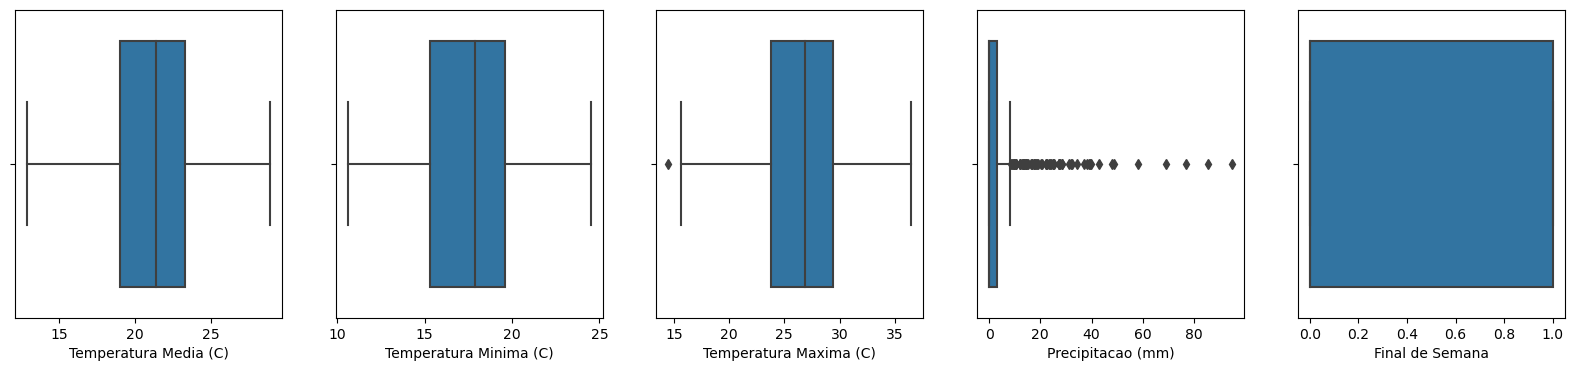

In [8]:
# Analyze features with outlier values

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 5, figsize = (20, 4))

sns.boxplot(ax = axes[0], x = data["Temperatura Media (C)"])
sns.boxplot(ax = axes[1], x = data["Temperatura Minima (C)"])
sns.boxplot(ax = axes[2], x = data["Temperatura Maxima (C)"])
sns.boxplot(ax = axes[3], x = data["Precipitacao (mm)"])
sns.boxplot(ax = axes[4], x = data["Final de Semana"])

# The below Plots show the outliers in the 3rd and 4th figures and are shown with the points other than the boxplots.

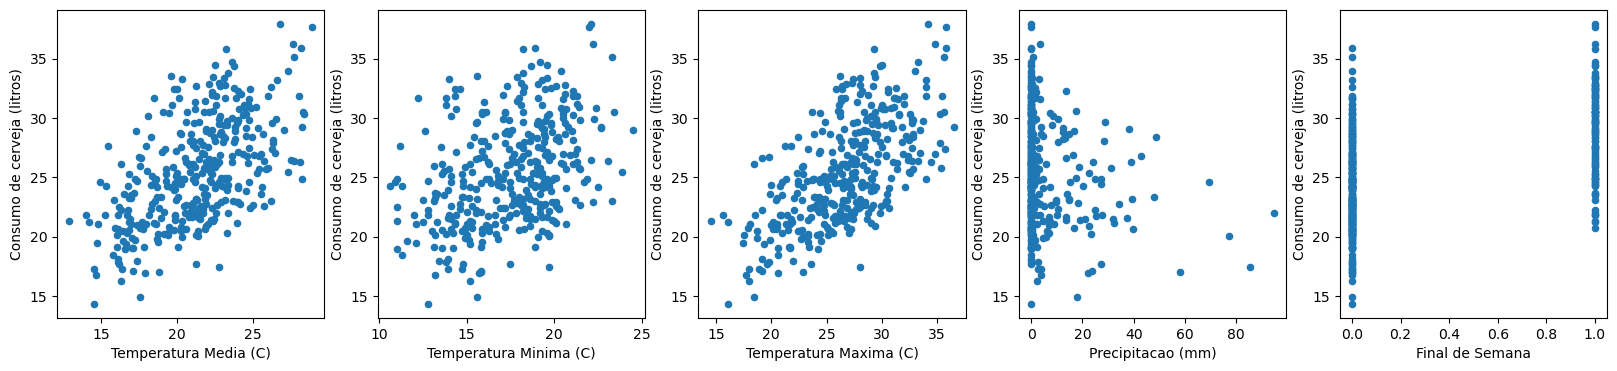

In [9]:
# Plot and analyze the correlation

fig, axes = plt.subplots(1, 5, figsize = (20, 4))

data.plot(ax = axes[0], x = "Temperatura Media (C)", y = "Consumo de cerveja (litros)", kind = "scatter")
data.plot(ax = axes[1], x = "Temperatura Minima (C)", y = "Consumo de cerveja (litros)", kind = "scatter")
data.plot(ax = axes[2], x = "Temperatura Maxima (C)", y = "Consumo de cerveja (litros)", kind = "scatter")
data.plot(ax = axes[3], x = "Precipitacao (mm)", y = "Consumo de cerveja (litros)", kind = "scatter")
data.plot(ax = axes[4], x = "Final de Semana", y = "Consumo de cerveja (litros)", kind = "scatter")
plt.show()

# A Positive Correlation exists between the Temperature Media (C), Temperature Minima (C), Temperature Maxima (C)
# and the Consumo de cerveja (litros)

In [10]:
# Split the dataset for training and testing

from sklearn.model_selection import train_test_split

X = data.iloc[:, :5]
y = data["Consumo de cerveja (litros)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
# Train a linear regression model and print the intercept and coefficients

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [-0.02966412  0.02410024  0.66705013 -0.05528092  5.08050445]
Intercept:  6.63209238348113


In [12]:
# Evaluate the model using the R2 score, mean absolute error, and root mean squared error

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

y_pred = lr.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.661518352682603
Mean Absolute Error:  2.117193986230358
Root Mean Squared Error:  2.450708910488736


# Problem Statement 2

In [13]:
# Load the data, check its shape and check for null values

house = pd.read_csv("california_housing_train.csv")
print("Shape: ", house.shape)
print("\n-----Null Values Count-----")
house.isnull().sum()

Shape:  (17000, 9)

-----Null Values Count-----


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [14]:
# Split the dataset for training and testing -1000 instances for testing

from sklearn.model_selection import train_test_split

X = house.iloc[:, :-1]
y = house["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1000, random_state=0)

In [15]:
# Train the model using sklearn (Apply linear regression to train a model for prediction)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the prices on test data and evaluate the modelby r2 score and mean absolute error

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = lr.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

R2 Score:  0.6140658023056096
Mean Absolute Error:  52417.58551295807


In [17]:
# Find coefficient and intercept using the trained model

print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [-4.30861845e+04 -4.28117411e+04  1.17167793e+03 -8.76656690e+00
  1.20394389e+02 -3.74535982e+01  4.17800068e+01  4.06517876e+04]
Intercept:  -3619591.677536837


# Problem Statement 3

In [18]:
# Load the data, check its shape and check for null values

insurance = pd.read_csv("insurance.csv")
print("Shape: ", insurance.shape)
print("-----Null Values Count-----")
insurance.isnull().sum()

Shape:  (1338, 7)
-----Null Values Count-----


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
# Convert categorical features to numerical values (Use One-Hot Encoding)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

insurance.iloc[:, 1:2] = pd.DataFrame(ohe.fit_transform(insurance.iloc[:, 1:2]).toarray()).astype('int')
insurance.iloc[:, 4:5] = pd.DataFrame(ohe.fit_transform(insurance.iloc[:, 4:5]).toarray()).astype('int')
insurance.iloc[:, 5:6] = pd.DataFrame(ohe.fit_transform(insurance.iloc[:, 5:6]).toarray()).astype('int')

In [20]:
# Split the dataset for training and testing

from sklearn.model_selection import train_test_split

X = insurance.iloc[:, :-1]
y = insurance["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [21]:
# Train the model using sklearn – Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Find the intercept and coefficient from the trained model

print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [   254.06084024     25.01859097    326.4820378     435.7147728
 -23581.38687197    643.04492494]
Intercept:  11359.630755303451


In [23]:
# Predict the prices of test data and evaluate the model using calculated r2 score and root mean squared error

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = lr.predict(X_test)

print("R2 Score: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

R2 Score:  0.7993149430815581
Mean Absolute Error:  3917.4664698330835


# Problem Statement 4

In [24]:
# Load the data, check its shape and check for null values

start = pd.read_csv("50_Startups.csv")

print("Shape: ", start.shape)
print("-----Null Values Count-----")
start.isnull().sum()

Shape:  (50, 5)
-----Null Values Count-----


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [25]:
# Convert categorical features to numerical values using Label Encoder

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

start.iloc[:, 3:4] = pd.DataFrame(ohe.fit_transform(start.iloc[:, 3:4]).toarray()).astype('int')

In [26]:
# Split the dataset for training and testing

from sklearn.model_selection import train_test_split

X = start.iloc[:, :-1]
y = start["Profit"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [27]:
# Train the model using sklearn(linear regression), also find the intercept and coefficient from the trained model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [ 0.77883396  0.02939405  0.03470854 -5.75221572]
Intercept:  42991.897811576666


In [28]:
# Predict the profits of test data and evaluate the model using r2 score and mean squared error

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = lr.predict(X_test)

print("R2 Score: ", r2_score(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))

R2 Score:  0.9359143665961587
Mean Absolute Error:  7321.0581062232595


In [29]:
# Regularize the model using Ridge Regression and find the Score

from sklearn.linear_model import Ridge

rr = Ridge(alpha=1)
rr.fit(X_train, y_train)

rr.score(X_test, y_test)

0.9393967031459635

In [30]:
# Regularize the model using Lasso Regression and find the Score

from sklearn.linear_model import Lasso

ll = Lasso(alpha = 1)
ll.fit(X_train, y_train)

ll.score(X_test, y_test)

0.939395904669798